In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
url = 'https://www.cia.gov/the-world-factbook/countries/armenia/'

In [21]:
headers = {"Accept-Language": 'en-US,en;q=0.9','User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.67 Safari/537.36 Edg/87.0.664.47'}

In [22]:
try:
    response = requests.get(url,headers=headers)
    response.raise_for_status()
except requests.exceptions.HTTPError as e:
    print(e)

In [23]:
soup = BeautifulSoup(response.text)

In [26]:
population = soup.select_one('div#people-and-society p').getText()
population


'3,011,609 (July 2021 est.)'

In [2]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
import time

In [14]:
driver_path = "C:\Development\chromedriver.exe"
url = 'https://www.cia.gov/the-world-factbook/countries/'
driver = webdriver.Chrome(driver_path)
driver.get(url)


import re
#for _ in range(5):
elements = driver.find_elements_by_css_selector('a.inline-link')
data = []


for _ in range(22):
    elements = driver.find_elements_by_css_selector('a.inline-link')

    for element in elements:
        country = element.text
        print(element.text,end=' ')
        url = element.get_attribute('href')
        response = requests.get(url)
        soup = BeautifulSoup(response.text)
        population = soup.select_one('div#people-and-society p').getText()
        if 'July 2021' in population:
            parentheses_index =population.index('(')
            population = population[:parentheses_index]

            data.append([country,population])
            print(country,population)
        #element.click()
        #time.sleep(3)
        #driver.back()
    #time.sleep(10)
    try:
        next_button = driver.find_element_by_xpath('/html/body/div/div[1]/div[2]/main/section/div/div/div[2]/div[2]/div/div/span[3]')
    except NoSuchElementException:
        break
    else:
        next_button.click()
        time.sleep(3)

Afghanistan Afghanistan 37,466,414 
Akrotiri Albania Albania 3,088,385 
Algeria Algeria 43,576,691 
American Samoa American Samoa 46,366 
Andorra Andorra 85,645 
Angola Angola 33,642,646 
Anguilla Anguilla 18,403 
Antarctica Antigua and Barbuda Antigua and Barbuda 99,175 
Argentina Argentina 45,864,941 
Armenia Armenia 3,011,609 
Aruba Aruba 120,917 
Ashmore and Cartier Islands Ashmore and Cartier Islands no indigenous inhabitants 
Australia Australia 25,809,973 
Austria Austria 8,884,864 
Azerbaijan Azerbaijan 10,282,283 
Bahamas, The Bahamas, The 352,655 
Bahrain Bahrain 1,526,929 
Bangladesh Bangladesh 164,098,818 
Barbados Barbados 301,865 
Belarus Belarus 9,441,842 
Belgium Belgium 11,778,842 
Belize Belize 405,633 
Benin Benin 13,301,694 
Bermuda Bermuda 72,084 
Bhutan Bhutan 857,423 
Bolivia Bolivia 11,758,869 
Bosnia and Herzegovina Bosnia and Herzegovina 3,824,782 
Botswana Botswana 2,350,667 
Bouvet Island Brazil Brazil 213,445,417 
British Indian Ocean Territory British Virg

In [16]:
factbook = pd.DataFrame(data,columns=['Country','Pop'])

In [35]:
import iso3166

In [23]:
factbook.Pop.str.replace('\D','')

C:\Users\Dara\anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        37466414
1         3088385
2        43576691
3           46366
4           85645
          ...    
229       2949246
230    7771630763
231      30399243
232      19077816
233      14829988
Name: Pop, Length: 234, dtype: object

In [26]:
import re

In [27]:
import re


def convert_to_number(value):
    
    value = re.sub(r'\D','',value)
    try:
        return int(value)
    except:
        return 0

In [29]:
factbook.Pop = factbook.Pop.apply(convert_to_number)

In [32]:
factbook.drop(factbook[factbook.Pop == 0].index,axis=0,inplace=True)

In [39]:
factbook.to_csv("countries_populations.csv",index=False)

In [42]:
pd.options.display.float_format = '{:,.2f}'.format

In [43]:
factbook.sort_values(by='Pop',ascending=False)

,Country,Pop
43,China,1397897720
96,India,1339330514
221,United States,334998398
97,Indonesia,275122131
158,Pakistan,238181034
...,...,...
173,"Saint Helena, Ascension, and Tristan da Cunha",7915
172,Saint Barthelemy,7116
141,Montserrat,5387
177,Saint Pierre and Miquelon,5321


In [46]:
factbook.style.format({'Pop': '{:,}'})

,Country,Pop
0,Afghanistan,"37,466,414"
1,Albania,"3,088,385"
2,Algeria,"43,576,691"
3,American Samoa,"46,366"
4,Andorra,"85,645"
5,Angola,"33,642,646"
6,Anguilla,"18,403"
7,Antigua and Barbuda,"99,175"
8,Argentina,"45,864,941"
9,Armenia,"3,011,609"


In [38]:
factbook.drop([230,69],inplace=True)

In [37]:
iso3166.countries.get('Bahamas')

Country(name='Bahamas', alpha2='BS', alpha3='BHS', numeric='044', apolitical_name='Bahamas')

In [49]:
url = 'https://www.un.org/en/member-states/'

In [50]:
try:
    response = requests.get(url)
    response.raise_for_status()
except requests.exceptions.HTTPError as e:
    print(e)

In [51]:
soup = BeautifulSoup(response.text)

In [55]:
states = soup.select('span.member-state-name')

In [58]:
member_states = []

In [59]:
for state in states:
    member_states.append(state.getText())

In [61]:
pd.Series(member_states)

0                            Afghanistan
1                                Albania
2                                Algeria
3                                Andorra
4                                 Angola
                     ...                
188    Venezuela, Bolivarian Republic of
189                             Viet Nam
190                                Yemen
191                               Zambia
192                             Zimbabwe
Length: 193, dtype: object

In [62]:
state_containers = soup.find_all(class_="member-state")


In [63]:
len(state_containers)

193

In [71]:
data = []

In [72]:
for state_container in state_containers:
    state_name = state_container.select_one('span.member-state-name').getText()
    join_date = state_container.select_one('span.date-display-single').getText()
    data.append([state_name,join_date])

In [75]:
df = pd.DataFrame(data,columns=['Name','Join_Date'])

In [76]:
df

,Name,Join_Date
0,Afghanistan,19-11-46
1,Albania,14-12-55
2,Algeria,08-10-62
3,Andorra,28-07-93
4,Angola,01-12-76
...,...,...
188,"Venezuela, Bolivarian Republic of",15-11-45
189,Viet Nam,20-09-77
190,Yemen,30-09-47
191,Zambia,01-12-64


In [85]:
pd.to_datetime(df.Join_Date,format="%d-%m-%y",infer_datetime_format=True)

0     2046-11-19
1     2055-12-14
2     2062-10-08
3     1993-07-28
4     1976-12-01
         ...    
188   2045-11-15
189   1977-09-20
190   2047-09-30
191   2064-12-01
192   1980-08-25
Name: Join_Date, Length: 193, dtype: datetime64[ns]

In [90]:
df[df.Join_Date.dt.year > 2015].min()

Name                 Afghanistan
Join_Date    2045-10-24 00:00:00
dtype: object

In [92]:
df[df.Name == 'Afghanistan']

,Name,Join_Date
0,Afghanistan,2046-11-19


In [104]:
x = pd.Timestamp("May 20 2046")

In [106]:
x.replace(year=x.year -100)

Timestamp('1946-05-20 00:00:00')

In [108]:
df.Join_Date.dt.year.value_counts().sort_index(ascending=False)

2068     3
2066     4
2065     3
2064     3
2063     2
2062     6
2061     4
2060    17
2058     1
2057     2
2056     4
2055    16
2050     1
2049     1
2048     1
2047     2
2046     4
2045    49
2011     1
2006     1
2002     2
2000     2
1999     3
1994     1
1993     6
1992    13
1991     7
1990     2
1984     1
1983     1
1981     3
1980     2
1979     1
1978     2
1977     2
1976     3
1975     6
1974     3
1973     2
1971     5
1970     1
Name: Join_Date, dtype: int64

In [110]:
df.loc[df.Join_Date.dt.year> 2020,'Join_Date'] = df.loc[df.Join_Date.dt.year > 2020,'Join_Date'].apply(lambda value: value.replace(value.year - 100))

In [111]:
df

,Name,Join_Date
0,Afghanistan,1946-11-19
1,Albania,1955-12-14
2,Algeria,1962-10-08
3,Andorra,1993-07-28
4,Angola,1976-12-01
...,...,...
188,"Venezuela, Bolivarian Republic of",1945-11-15
189,Viet Nam,1977-09-20
190,Yemen,1947-09-30
191,Zambia,1964-12-01


<AxesSubplot:xlabel='Join_Date'>

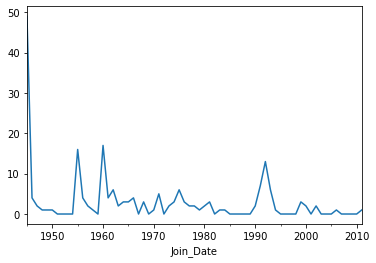

In [117]:
df.resample('Y',on='Join_Date',kind='period').size().plot()